# Analiza podatkov s strani _Allmovie.com_
**Jan Kamnikar, Programiranje 1, september 2023**

# 1. Uvod

V okviru projektne naloge bomo na različne načine obdelali podatke s strani [Allmovie.com](https://allmovie.com) in poizkusili potrditi oz. ovreči nekaj raziskovalnih hipotez. Spletna stran _Allmovie_ vsebuje podatke o filmih, igralcih in režiserjih. Osredotočili se bomo na filme. 

Podatke s strani smo zajeli s programskim jezikom _Python_, knjižnico _requests_ in uporabo regularnih izrazov. Ker se spletna stran _Allmovie_ močno zanaša na uporabo programskega jezika javascript za prikazovanje vsebine, smo knjižnico _requests_ nadomestili z modificirano verzijo [requests-HTML](https://requests.readthedocs.io/projects/requests-html/en/latest/) , ki omogoča shranjevanje spletne strani v HTML po tem, ko se izvede javascript.

**Zajem podatkov**

Podatke o filmih smo zajemali po kategorijah. Na vsaki strani je prikazanih približno 12 filmov v posamezni kategoriji. Za vsako kategorijo smo shranili 12 strani. Filmi so lahko hkrati v več kategorijah, zato smo na ta način nabrali nekaj več kot 1000 različnih filmov. Iz seznamov smo povezave do strani za posameznih filmov in jih shranili. Posebaj smo shranili tudi podstran, ki vsebuje filmske igralce za posamezen film.

Podatke smo iz shranjenih HTML datotek obdelali z uporabo regularnih izrazov in jih shranili v obliki JSON ter normalizirali in shranili v več CSV tabel. Za vsak film smo shranili sledeče podatke:

- naslov
- leto
- opis
- trajanje
- ocena kritikov
- oznaka (MPAA)
- igralci
- režiserji
- žanri
- države snemanja
- teme, ki se pojavljajo v filmu
- oznake primernosti filma (MPAA flags)

Ocene filma, ki jo določi publika, s strani nismo mogli dobiti, saj uporablja naprednejši javascript kot ga zna prebrati requests-HTML.


# 2. Podatki

Poglejmo si zajete podatke o filmih iz datoteke `.csv`:

In [67]:
import pandas as pd

pd.options.display.min_rows = 20

pd.options.display.max_rows = 20

In [68]:
filmi = pd.read_csv('obdelani-podatki/filmi.csv', index_col='film')
filmi

,naslov,leto,opis,trajanje,ocena_kritikov,oznaka
film,,,,,,
0,Prince of the City,1981,"Inspired by a true story, Prince of the City s...",167.0,9,R
1,The Black Phone,2022,"It is 1978 in North Denver, and shy thirteen-y...",102.0,8,R
2,The Tree of Life,2011,The eldest son of a 1950s-era Texas family set...,139.0,9,PG13
3,Born Yesterday,1950,Garson Kanin's Broadway hit was transferred to...,103.0,9,NR
4,Quatermass II: Enemy from Space,1957,"Originally titled Quatermass II, Enemy from Sp...",85.0,9,NR
5,Star Wars: The Empire Strikes Back,1980,The second entry in George Lucas' Star Wars tr...,124.0,10,PG
6,Eternity and a Day,1998,Theo Angelopoulos (Reconstruction) directed th...,134.0,10,NR
7,In the Shadows,2001,New York hit man Eric O'Byrne (Matthew Modine)...,105.0,9,R
8,Nina Forever,2015,Grieving boyfriend Rob (Cian Barry) has hope t...,98.0,8,R


Poglejmo si še ostale tabele `.csv`:

In [69]:
pd.options.display.min_rows = 10
pd.options.display.max_rows = 10

ljudje_indeks = pd.read_csv('obdelani-podatki/ljudje_indeks.csv', index_col='clovek')
ljudje_indeks

,ime
clovek,
0,Jonathan LaPaglia
1,Peter MacNeill
2,Kotono Mitsuishi
3,Craig Archibald
4,Peter Drynan
...,...
25307,Luis Aduviri
25308,Jerry Callaghan
25309,William Fichtner


In [70]:
ljudje_filmi = pd.read_csv('obdelani-podatki/ljudje_filmi.csv', index_col='film')
ljudje_filmi

,clovek,vloga
film,,
0,16497,Igralec
0,10923,Igralec
0,664,Igralec
0,15516,Igralec
0,661,Igralec
...,...,...
1015,1166,Igralec
1015,15800,Igralec
1015,18547,Igralec


In [71]:
teme_filmi = pd.read_csv('obdelani-podatki/teme_filmi.csv', index_col='film')
teme_filmi

,tema
film,
0,Police Corruption
0,Whistleblowers
1,Kidnapping
1,Serial Killers
2,Existential Crisis
...,...
1014,White People Among Indians
1015,Culture Clash
1015,Farm Life


In [72]:
zanri_filmi = pd.read_csv('obdelani-podatki/zanri_filmi.csv', index_col='film')
zanri_filmi

,zanr
film,
0,Thriller
0,Drama
0,Crime
1,Horror
1,Crime
...,...
1014,Western
1014,Drama
1015,Action


In [73]:
oznake_filmi = pd.read_csv('obdelani-podatki/oznake_filmi.csv', index_col='film')
oznake_filmi

,oznaka
film,
0,Adult Language
0,Adult Situations
0,Not For Children
0,Profanity
0,Violence
...,...
1014,Mild Violence
1014,Questionable for Children
1014,Western Violence


# 3. Hipoteze

Na podlagi zajetih podatkov smo oblikovali 5 hipotez, ki jih bomo v nadaljevanju z obdelavo podatkov potrdili ali ovrgli. 

1. Z leti so filmi postali bolj nasilni oz. imajo strožje omejitve za starost gledalcev.
2. Boljši filmi obravnavajo bolj temačne tematike. 
3. Dobrih režiserjev je le peščica.
4. Isti igralci nastopajo v filmih s podobnimi žanri. 
5. Ali lahko s pomočjo opisa filma napovemo, katere oznake primernosti bo imel naš film (npr. violence, adult situations, not for children, nudity, itd.)?


# 4. Analiza podatkov
---

**1. Hipoteza**: Z leti so filmi postali bolj nasilni oz. imajo strožje omejitve za starost gledalcev.

In [74]:
unikatne_oznake = filmi['oznaka'].unique().astype(str)
print('Možne oznake filmov:',", ".join(unikatne_oznake))
# Oznake rangiramo na podlagi definicije oznake na: https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system
ocena_oznake = {
    'G': 0,
    'PG': 1,
    'PG-13': 2,
    'R': 3,
    'NC-17': 4,
    'NR': None,
    'nan': None
}
print('Ocene oznak:', ocena_oznake)
filmi['oznaka-ocena'] = filmi['oznaka'].map(ocena_oznake)
# Delamo samo s filmi, ki imajo oznake
oznaceni_filmi = filmi[filmi['oznaka-ocena'].notnull()]
oznaceni_filmi

Možne oznake filmov: R, PG13, NR, PG, nan, G, NC17
Ocene oznak: {'G': 0, 'PG': 1, 'PG-13': 2, 'R': 3, 'NC-17': 4, 'NR': None, 'nan': None}


,naslov,leto,opis,trajanje,ocena_kritikov,oznaka,oznaka-ocena
film,,,,,,,
0,Prince of the City,1981,"Inspired by a true story, Prince of the City s...",167.0,9,R,3.0
1,The Black Phone,2022,"It is 1978 in North Denver, and shy thirteen-y...",102.0,8,R,3.0
5,Star Wars: The Empire Strikes Back,1980,The second entry in George Lucas' Star Wars tr...,124.0,10,PG,1.0
7,In the Shadows,2001,New York hit man Eric O'Byrne (Matthew Modine)...,105.0,9,R,3.0
8,Nina Forever,2015,Grieving boyfriend Rob (Cian Barry) has hope t...,98.0,8,R,3.0
...,...,...,...,...,...,...,...
999,"4 Months, 3 Weeks and 2 Days",2007,"Director Cristian Mungiu's drama 4 Months, 3 W...",110.0,10,R,3.0
1002,Her,2013,Joaquin Phoenix stars in Spike Jonze's soulful...,126.0,9,R,3.0
1006,Bowling for Columbine,2002,"Filmmaker, author, and political activist Mich...",120.0,9,R,3.0


<Axes: title={'center': 'Povprečna ocena oznake filma skozi čas'}, xlabel='Leto', ylabel='Povprečna ocena oznake'>

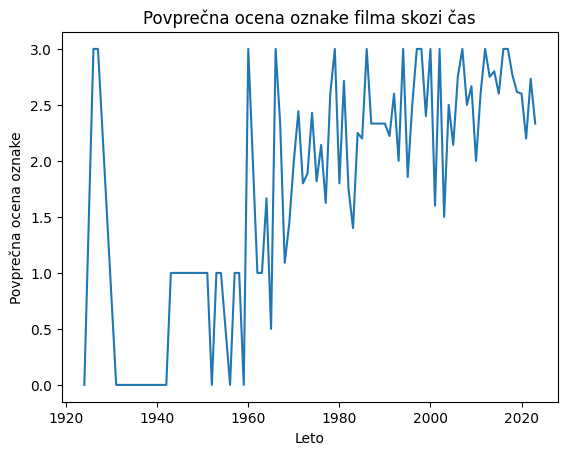

In [75]:
povprecna_oznaka = oznaceni_filmi.groupby('leto')['oznaka-ocena'].mean()
povprecna_oznaka.plot(xlabel='Leto', ylabel='Povprečna ocena oznake', title='Povprečna ocena oznake filma skozi čas')

Na podlagi zgornjega grafa lahko potrdimo, da so z leti filmi postali bolj nasilni oz. imajo strožje omejitve za starost gledalcev. **S tem smo potrdili 1. hipotezo.**

---

**2. Hipoteza**: Boljši filmi obravnavajo bolj temačne tematike.

<Axes: title={'center': 'Povprečna ocena kritikov glede na žanr'}, xlabel='Žanr', ylabel='Povprečna ocena kritikov'>

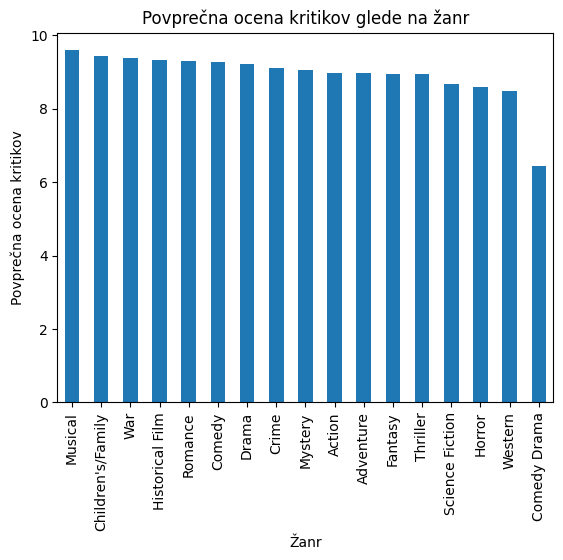

In [76]:
ocenjeni_filmi = filmi[filmi['ocena_kritikov'].notnull()]
zanr = zanri_filmi.join(ocenjeni_filmi, on=['film'])
zanr = zanr.groupby('zanr').filter(lambda x: len(x) > 20).groupby('zanr')['ocena_kritikov'].mean().sort_values(ascending=False)
zanr.plot.bar(xlabel='Žanr', ylabel='Povprečna ocena kritikov', title='Povprečna ocena kritikov glede na žanr')


<Axes: title={'center': 'Povprečna ocena kritikov glede na temo'}, xlabel='Tema', ylabel='Povprečna ocena kritikov'>

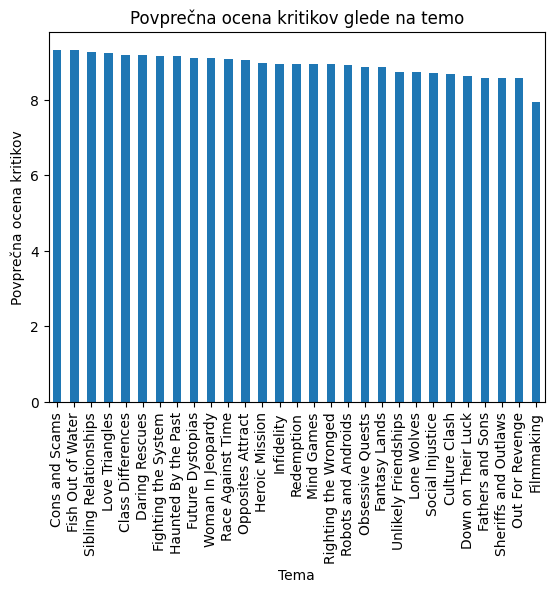

In [77]:
ocenjeni_filmi = filmi[filmi['ocena_kritikov'].notnull()]
tema = teme_filmi.join(ocenjeni_filmi, on=['film'])
tema = tema.groupby('tema').filter(lambda x: len(x) > 20).groupby('tema')['ocena_kritikov'].mean().sort_values(ascending=False)
tema.plot.bar(xlabel='Tema', ylabel='Povprečna ocena kritikov', title='Povprečna ocena kritikov glede na temo')


Pri izrisu zgornijh dveh grafov smo se omejili le na skupine, v katerih imamo več kot 20 filmov. Delamo se, da obravnavamo le popularne tematike. Na podlagi zgornjih dveh diagramov **2. hipotezo ovržemo**, saj imamo z boljšimi ocenami tudi ljubezenske in druge tematike. 

---

**3. Hipoteza**: Dobrih režiserjev je le peščica.

<Axes: title={'center': 'Porazdelitev režiserjev'}, ylabel='Frequency'>

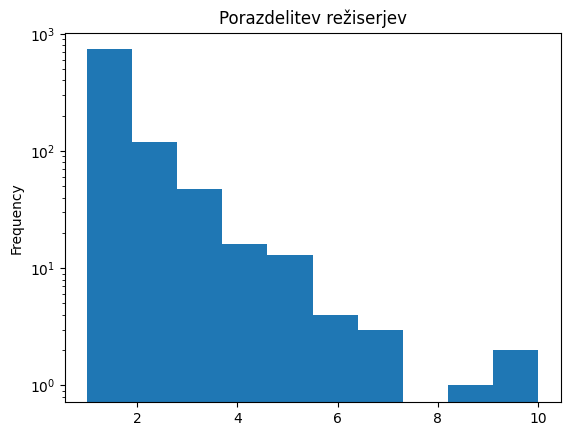

In [78]:
reziserji = ljudje_filmi.where(ljudje_filmi['vloga'] == 'Reziser').dropna()
reziserji = reziserji.join(ocenjeni_filmi, on=['film'])
aggr = reziserji.groupby('clovek').agg({'naslov':'count', 'ocena_kritikov': 'mean'}).sort_values(ascending=False, by='naslov')
reziserji = aggr.join(ljudje_indeks, on=['clovek'])

# porazdelitev števila filmov na reziserja
reziserji['naslov'].plot.hist(bins=10, title='Porazdelitev režiserjev', log=True, xlabel='Število filmov', ylabel='Število režiserjev')

<Axes: title={'center': 'Povprečna ocena kritikov glede na število filmov'}, xlabel='Število filmov', ylabel='Povprečna ocena kritikov'>

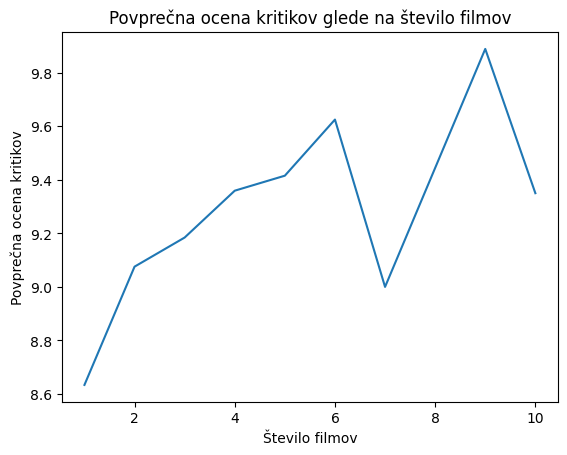

In [79]:
# povprecna ocena glede na stevilo filmov
avg = reziserji.groupby('naslov')['ocena_kritikov'].mean()
avg.plot(xlabel='Število filmov', ylabel='Povprečna ocena kritikov', title='Povprečna ocena kritikov glede na število filmov')

Kot vidimo iz zgornijh dveh grafov, je število režiserjev, ki je režiralo veliko filmov (9 ali 10) majhno. Prav tako so v povprečju te filmi bolje ocenjeni. Tako lahko trdimo, da je dobrih režiserjev (torej takih, ki imajo in veliko filmov in v povprečju visiko oceno) le peščica. S tem **potrdimo 3. hipotezo**.

---

**4. Hipoteza**: Isti igralci nastopajo v filmih s podobnimi žanri.

<Axes: title={'center': 'Porazdelitev igralcev'}, ylabel='Frequency'>

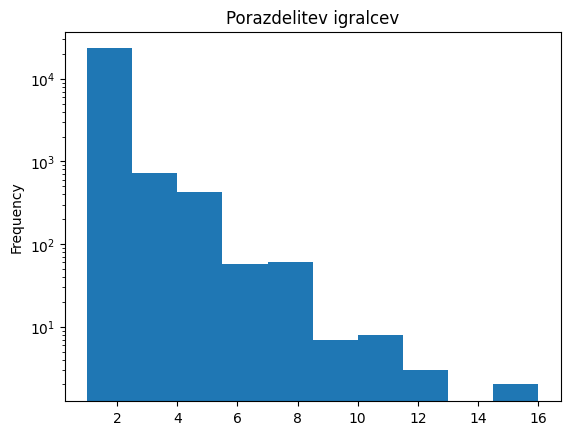

In [80]:
igralci = ljudje_filmi.where(ljudje_filmi['vloga'] == 'Igralec').dropna()
igralci = igralci.join(ocenjeni_filmi, on=['film'])
aggr = igralci.groupby('clovek').agg({'naslov':'count', 'ocena_kritikov': 'mean'}).sort_values(ascending=False, by='naslov')
igralci = aggr.join(ljudje_indeks, on=['clovek'])

# porazdelitev števila filmov na reziserja
igralci['naslov'].plot.hist(bins=10, title='Porazdelitev igralcev', log=True, xlabel='Število filmov', ylabel='Število igralecv')

<Axes: title={'center': 'Povprečna ocena kritikov glede na število filmov'}, xlabel='Število filmov', ylabel='Povprečna ocena kritikov'>

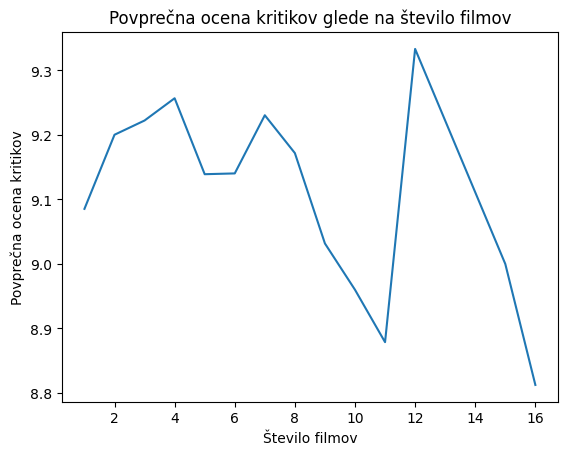

In [81]:
# povprecna ocena glede na stevilo filmov
avg = igralci.groupby('naslov')['ocena_kritikov'].mean()
avg.plot(xlabel='Število filmov', ylabel='Povprečna ocena kritikov', title='Povprečna ocena kritikov glede na število filmov')

Ugotovimo, da v veliko filmih (10 in več) z našega seznama igra le peščica igralcev.

<Axes: title={'center': 'Povezava med številom filmov in povprečno oceno igralca'}, xlabel='Število filmov', ylabel='Povprečna ocena kritikov'>

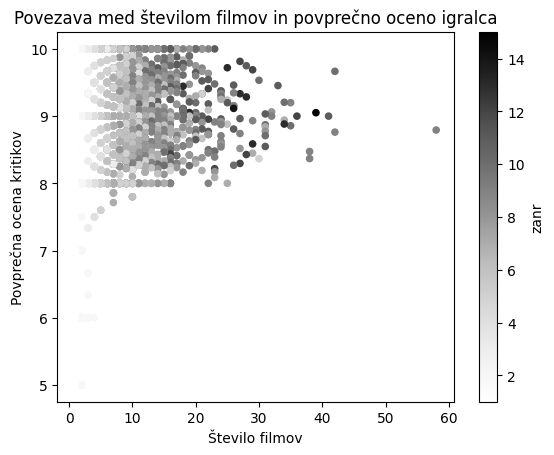

In [82]:
igralci = ljudje_filmi.where(ljudje_filmi['vloga'] == 'Igralec').dropna()
igralci = igralci.join(ocenjeni_filmi, on=['film'])
zanri_igralci = zanri_filmi.join(igralci, on=['film'])
zanri_igralci = zanri_igralci.groupby('clovek').agg({'zanr': 'nunique', 'ocena_kritikov': 'mean', 'naslov': 'count'}).sort_values(ascending=False, by=['naslov', 'ocena_kritikov'])
zanri_igralci.plot.scatter(x='naslov', y='ocena_kritikov', c='zanr', title='Povezava med številom filmov in povprečno oceno igralca', xlabel='Število filmov', ylabel='Povprečna ocena kritikov')

Iz tega grafa lahko ugotovimo, da zelo ekstremnih igralcev (ki bi imeli ogromno število filmov in zelo visiko povprečno oceno) nimamo. Imamo pa "dobre" igralce, ki imajo zmerno število filmov in visiko povprečno oceno.

In [83]:
pd.options.display.min_rows = 20
pd.options.display.max_rows = 20
zanri_igralci[zanri_igralci.naslov > 5].join(ljudje_indeks, on=['clovek']).sort_values(ascending=False, by=['naslov'])


,zanr,ocena_kritikov,naslov,ime
clovek,,,,
17597.0,9,8.793103,58,John Wayne
4495.0,10,9.666667,42,Ward Bond
21191.0,9,8.761905,42,James Stewart
7077.0,11,9.000000,41,Walter Brennan
910.0,15,9.051282,39,Drama
7602.0,9,8.473684,38,Guy Wilkerson
3613.0,9,8.368421,38,Chuck Roberson
12518.0,12,9.000000,36,Hank Worden
10500.0,10,8.857143,35,Samuel L. Jackson


Zdaj nas zanima še ali igralci z visoko povprečno oceno igrajo pretežno v enih in istih žarnih filmov. Odgovor najdemo v zgornji tabeli. Igralci z zelo veliko filmi igrajo tudi v veliko žarnih. Vendar so podatki lahko malo zavajujoči. Če pogledamo prvo uvrščenega Johna Wayna, je znan predvsem po Westernih - kar iz podatkov v tabeli ni pretirano očitno - deluje kot zelo razgiban lik. Iz tega zaključimo, da je **4. hipoteza ovržena**, saj imajo tudi igralci z visoko oceno veliko žanrov (5 in več). 

---

**5. Hipoteza**: Ali lahko s pomočjo opisa filma napovemo, katere oznake primernosti bo imel naš film (npr. violence, adult situations, not for children, nudity, itd.)?

V ta namen uporabimo Bayseov naivni klasifikator, ki ga implementiramo na primeru seznama filmov in oznak filmov.

In [84]:
def odstrani_konce(beseda, konci):
    for konec in konci:
        if beseda.endswith(konec):
            return beseda[:-len(konec)]
    return beseda
    
def koren_besede(beseda):
    beseda = ''.join(znak for znak in beseda if znak.isalpha())
    if not beseda:
        return '$'
    beseda = odstrani_konce(beseda, ["ing", "ed", "en", "s"])
    beseda = beseda.rstrip('aeiou')
    if not beseda:
        return '@'
    return beseda

def koreni_besed(niz):
    niz = str(niz)
    return pd.Series(sorted({
        koren_besede(beseda) for beseda in niz.replace('-', ' ').lower().split() if beseda
    }))

razpredelnica_s_koreni_filmov  = filmi.opis.apply(koreni_besed)
razpredelnica_s_koreni_filmov

,0,1,2,3,4,5,6,7,8,9,...,543,544,545,546,547,548,549,550,551,552
film,,,,,,,,,,,,,,,,,,,,,
0,@,agr,almost,als,alway,and,ar,assuranc,b,becom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$,@,after,aid,and,baseball,basement,bik,cannot,childr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,@,action,an,and,answer,becom,brad,celebrat,challeng,director,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,@,along,an,and,awaken,better,bill,broadway,brock,broderick,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,@,about,again,al,als,and,arriv,availabl,b,bas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,@,acquaintanc,affect,alec,all,and,apparently,ar,arch,at,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,$,@,about,achil,adopt,after,alban,albanian,alexander,an,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,@,accident,adam,als,an,and,anx,becom,befor,but,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,@,abigail,and,b,barry,behind,best,betw,blood,boyfriend,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
koreni_filmov = (razpredelnica_s_koreni_filmov.unstack().reset_index()[['film', 0]].rename({0: "koren"},axis=1).dropna())
koreni_filmov

,film,koren
0,0,@
1,1,$
2,2,@
3,3,@
4,4,@
5,5,@
6,6,$
7,7,@
8,8,@
9,9,@


In [86]:
oznake_filmi

,oznaka
film,
0,Adult Language
0,Adult Situations
0,Not For Children
0,Profanity
0,Violence
1,Drug Content
1,Profanity
1,Violence
2,Violence


In [87]:
koreni_oznak = pd.merge(koreni_filmov, oznake_filmi, on='film')
koreni_oznak

,film,koren,oznaka
0,0,@,Adult Language
1,0,@,Adult Situations
2,0,@,Not For Children
3,0,@,Profanity
4,0,@,Violence
5,0,agr,Adult Language
6,0,agr,Adult Situations
7,0,agr,Not For Children
8,0,agr,Profanity
9,0,agr,Violence


In [88]:
pojavitve_oznak = oznake_filmi.groupby("oznaka").size()
verjetnosti_oznak = pojavitve_oznak / len(filmi)
pojavitve_oznak

oznaka
Adult Humor                59
Adult Language            111
Adult Situations          327
Alcohol Consumption         7
Brief Nudity               38
Child Classic              16
Children in Peril           3
Drug Content               47
Excellent For Children     19
Gore                       23
                         ... 
Substance Abuse            14
Suitable for Children     117
Suitable for Teens         16
Torture                     1
Violence                  267
War Violence               12
Watch With Your Kids        9
Watch With Your Teen       10
Western Violence           25
Youth Substance Use         5
Length: 35, dtype: int64

In [89]:
stolpec_verjetnosti_korenov_pri_oznakah = koreni_oznak.groupby(["oznaka", "koren"]).size() / pojavitve_oznak
verjetnosti_korenov_pri_oznakah = stolpec_verjetnosti_korenov_pri_oznakah.unstack().transpose().fillna(1 / len(filmi))
verjetnosti_korenov_pri_oznakah

oznaka,Adult Humor,Adult Language,Adult Situations,Alcohol Consumption,Brief Nudity,Child Classic,Children in Peril,Drug Content,Excellent For Children,Gore,...,Substance Abuse,Suitable for Children,Suitable for Teens,Torture,Violence,War Violence,Watch With Your Kids,Watch With Your Teen,Western Violence,Youth Substance Use
koren,,,,,,,,,,,,,,,,,,,,,
$,0.474576,0.504505,0.568807,0.571429,0.631579,0.750000,0.666667,0.446809,0.631579,0.391304,...,0.571429,0.529915,0.687500,0.000984,0.524345,0.583333,0.666667,0.700000,0.680000,0.600000
@,0.983051,1.000000,0.993884,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.974359,1.000000,1.000000,0.992509,1.000000,1.000000,1.000000,1.000000,1.000000
aaker,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,...,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.040000,0.000984
aaron,0.000984,0.009009,0.003058,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,...,0.000984,0.000984,0.000984,0.000984,0.011236,0.000984,0.000984,0.000984,0.040000,0.000984
aaronson,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,...,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984
ab,0.000984,0.009009,0.003058,0.000984,0.026316,0.062500,0.000984,0.000984,0.000984,0.000984,...,0.000984,0.008547,0.000984,0.000984,0.011236,0.000984,0.000984,0.000984,0.000984,0.000984
abandon,0.033898,0.000984,0.021407,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,...,0.000984,0.017094,0.000984,0.000984,0.018727,0.000984,0.111111,0.000984,0.000984,0.000984
abb,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,...,0.000984,0.000984,0.000984,0.000984,0.003745,0.000984,0.000984,0.000984,0.000984,0.000984
abbas,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,0.000984,...,0.000984,0.000984,0.000984,0.000984,0.003745,0.000984,0.000984,0.000984,0.000984,0.000984


Z dobljeno tabelo lahko sedaj določimo verjetnost za oznako za poljuben opis filma. To preverimo na primeru dveh filmov Django Unchained in Toy Story.

In [90]:
def oznake(opis):
    koreni_filma = koreni_besed(opis)
    r = verjetnosti_korenov_pri_oznakah.reset_index()
    verjetnosti = r[r.koren.isin(koreni_filma)].product(numeric_only=True) * verjetnosti_oznak
    return verjetnosti.sort_values(ascending=False).head(5)

print('Oznake za film Django Unchained:')
oznake("A former slave and a German bounty hunter become unlikely allies in the battle against a tyrannical plantation owner in this western from visionary director Quentin Tarantino. Two years before the Civil War pits brother-against-brother, German-born fugitive hunter Dr. King Schultz (Academy Award-winner Christoph Waltz) arrives in America determined to capture the outlaw Brittle brothers dead or alive. In the midst of his search, Dr. Schultz crosses paths with Django (Academy Award-winner Jamie Foxx), a freed slave and skilled tracker who seeks to rescue his beloved wife Broomhilda (Kerry Washington) from ruthless plantation owner Calvin Candie (Academy Award-nominee Leonardo DiCaprio). Once Django has aided Dr. Schultz in coralling the Brittle brothers, the two team up to capture some of the most wanted men in the South. Meanwhile, Django never loses sight of his mission to free Broomhilda from the treacherous slave trade before it's too late. Upon arriving at Candie's nefarious plantation, dubbed Candyland, Django and Dr. Schultz discover that slaves are being groomed for gladiator-like competitions by Candie's malevolent right-hand man Billy Crash (Walton Goggins), and together they skillfully work their way onto the compound for a closer look. But just as Django and his partner locate Broomhilda and plot a daring escape, Candie's house slave Stephen (Academy Award-nominee Samuel L. Jackson) catches wind of their plan, and informs his master of the betrayal. Now, as a clandestine organization attempts to back them into a corner, Django and Dr. Schultz will have to come out with pistols blazing if they ever hope to free Broomhilda from Candyland and the clutches of its vile proprietor.")


Oznake za film Django Unchained:


oznaka
Violence                     2.976595e-215
Not For Children             2.961248e-215
Suitable for Children        1.281965e-215
Adult Situations             7.552206e-216
Questionable for Children    2.164144e-224
dtype: float64

In [91]:
print('Oznake za film Toy Story:')
oznake("Toy Story was the first feature-length film animated entirely by computer. If this seems to be a sterile, mechanical means of moviemaking, be assured that the film is as chock-full of heart and warmth as any Disney cartoon feature. The star of the proceedings is Woody, a pull-string cowboy toy belonging to a wide-eyed youngster named Andy. Whenever Andy's out of the room, Woody revels in his status as the boy's number one toy. His supremacy is challenged by a high-tech, space-ranger action figure named Buzz Lightyear, who, unlike Woody and his pals, believes that he is real and not merely a plaything. The rivalry between Woody and Buzz hilariously intensifies during the first half of the film, but when the well-being of Andy's toys is threatened by a nasty next-door neighbor kid named Sid -- whose idea of fun is feeding stuffed dolls to his snarling dog and reconstructing his own toys into hideous mutants -- Woody and Buzz join forces to save the day. Superb though the computer animation may be, what really heightens Toy Story are the voice-over performances by such celebrities as Tom Hanks (as Woody), Tim Allen (as Buzz), and Don Rickles (as an appropriately acerbic Mr. Potato Head). Director John Lasseter earned a special achievement Academy Award, while Randy Newman landed an Oscar nomination for his evocative musical score.")

Oznake za film Toy Story:


oznaka
Child Classic            5.252273e-121
Adult Situations         2.040455e-219
Mild Violence            6.617125e-220
Suitable for Children    3.266191e-220
Not For Children         1.541045e-220
dtype: float64

S tem tudi **potrdimo 5. hipotezo**, saj prvi dobljeni oznaki dobro ustrezata karakteristikam posameznega filma.